In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
data = pd.read_csv("/content/diamonds.csv")

In [ ]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Столбцы:

**price**: цена в долларах США ( \$326 - \$18,823 )

**carat**: вес бриллианта ( 0,2 - 5,01 )

**cut**: качество огранки ( Fair, Good, Very Good, Premium, Ideal )

**color**: цвет бриллианта, от J ( худший ) до D ( лучший )  ( D, E, F, G, H, I, J )

**clarity**: показатель прозрачности бриллианта ( I1 ( худший ), SI2, SI1, VS2, VS1, VVS2, VVS1, IF ( лучший ) ).

**x**: длина в мм ( 0 - 10,74 )

**y**: ширина в мм ( 0 - 58,9 )

**z**: глубина в мм ( 0 - 31,8 )

**depth**: общая глубина в процентах = z / mean( x, y ) = 2 * z / ( x + y ) ( 43 - 79 )

**table**: ширина вершины алмаза относительно самой широкой точки ( 43 - 95 )

# Проведите первичное статистическое исследование количественных (минимальный, максимальный значения столбцов, медиана и т.п.) и категориальных признаков.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Столбец Unnamed: 0 копирует индексы, его можно удалить:

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

## Количественные признаки:

In [ ]:
numeric_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


carat:
- Медиана: 0.797940
- Минимум: 0.2
- Среднее: 0.7
- Максимум: 5.01

depth:
- Медиана: 61.749405
- Минимум: 43.0
- Среднее: 61.8
- Максимум: 79.0

table:
- Медиана: 57.457184
- Минимум: 43.0
- Среднее: 57.0
- Максимум: 95.0

price:
- Медиана: 3932.799722
- Минимум: 326.0
- Среднее: 2401.0
- Максимум: 18823.0

x:
- Медиана: 5.731157
- Минимум: 0.0
- Среднее: 5.7
- Максимум: 10.74

y:
- Медиана: 5.734526
- Минимум: 0.0
- Среднее: 5.71
- Максимум: 58.9

z:
- Медиана: 3.538734
- Минимум: 0.0
- Среднее: 3.53
- Максимум: 31.8

## Категориальные признаки:

In [ ]:
categorical_features = ['cut', 'color', 'clarity']

In [ ]:
data.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [ ]:
for col in categorical_features:
    print(f"{col}: {data[col].unique()}")

cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


# Определите наличие пропусков и дубликатов в данных. При необходимости заполните пропуски и удалите дубликаты.

## Пропуски

### Явные пропуски

In [ ]:
data.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


Явных пропусков нет

### Неявные пропуски

Заметим, что в x, y, z минимальное значение - 0. Их можно заполнить по формуле, если пропущено не более одного признака ( depth, x, y, z ), иначе их востановить нельзя.

$$
depth = \frac{z}{mean(x, y)} = \frac{2 ⋅ z}{x + y}
$$

$$
x = \frac{2 \cdot z}{depth} - y
$$

$$
y = \frac{2 \cdot z}{depth} - x
$$

$$
z = \frac{depth \cdot (x + y)}{2}
$$

In [ ]:
null_mask = np.isclose(data.x, 0.0) | np.isclose(data.y, 0.0) | np.isclose(data.z, 0.0) | np.isclose(data.depth, 0.0)
data[null_mask]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [ ]:
z_zero = data[(data['z'] == 0) & (data['x'] != 0) & (data['y'] != 0)].index

In [ ]:
data.loc[z_zero, 'z'] = data.loc[z_zero, 'depth'] * (data.loc[z_zero, 'x'] + data.loc[z_zero, 'y']) / 2

In [ ]:
data.loc[z_zero]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,385.0365
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,385.2030
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,408.5550
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,383.9120
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,454.0800
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,405.8160
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,503.1180
26123,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,519.2110
27112,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,513.7740
27503,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,500.6595


Удаление строк, которые нельзя заполнить

In [ ]:
zero_del = data[((data['z'] == 0) & (data['x'] == 0)) |
                ((data['y'] == 0) & (data['x'] == 0)) |
                 ((data['z'] == 0) & (data['y'] == 0)) |
                  ((data['z'] == 0) & (data['x'] == 0) & (data['y'] == 0))].index

In [ ]:
data.loc[zero_del]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [ ]:
data = data.drop(zero_del).reset_index(drop=True)

In [ ]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53927,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53928,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53929,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53930,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Дубликаты

In [ ]:
data.duplicated().sum()

np.int64(145)

In [ ]:
data = data.drop_duplicates().reset_index(drop=True)

In [ ]:
data = data.reset_index(drop=True)

# Визуализируйте распределение некоторых признаков.

## Числовые

In [ ]:
nums_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

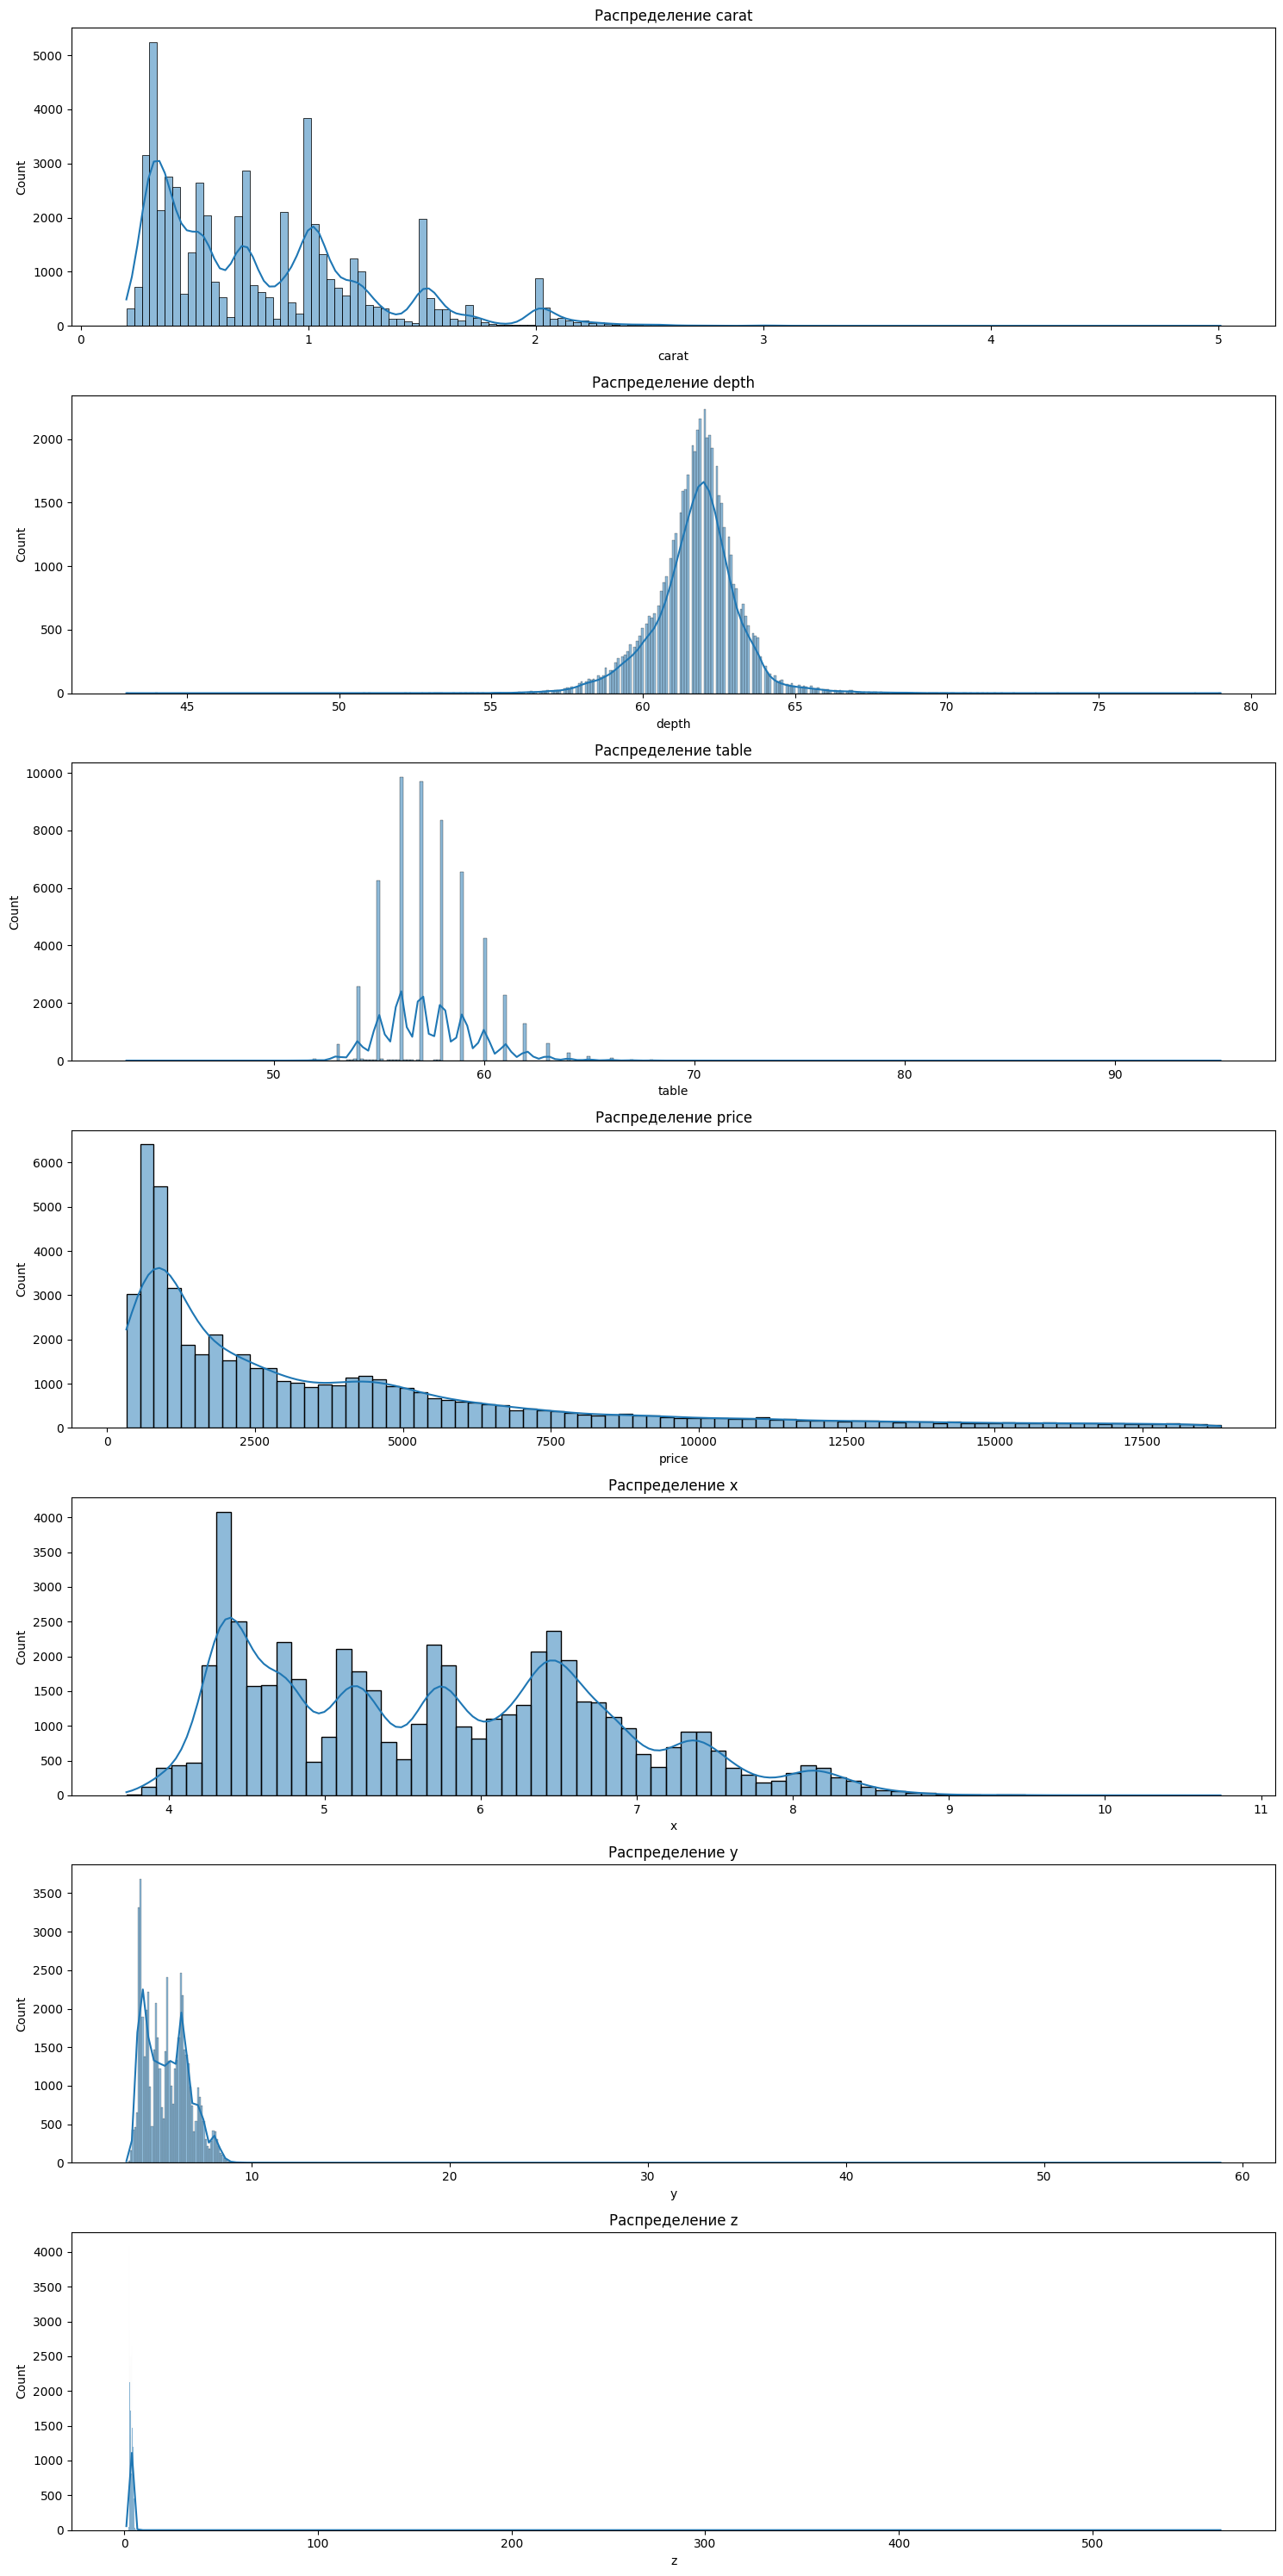

In [ ]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(nums_columns, 1):
    plt.subplot(7, 1, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Распределение {column}')
plt.tight_layout()
plt.show()

1. **Вес ( carat )**  
   - Большая часть значений сосредоточена в диапазоне до 1 карата.
   - Наблюдаются выраженные пики в определённых значениях, что может быть связано с популярными размерами бриллиантов.  

2. **Ширина вершины алмаза ( table ) и глубина ( depth )**  
   - Depth имеет нормальное распределение, а значит, выбросов почти нет.  
   - Table демонстрирует резкие пики на определенных значениях, что может указывать на наличие популярных стандартных пропорций.  

3. **Цена ( price )**  
   - Наблюдаются высокие цены, которые могут быть выбросами, но их нужно анализировать в контексте других характеристик (например, веса и чистоты бриллианта).  

4. **Размеры бриллиантов ( x, y, z )**  
   - Переменные x, y и z, отвечающие за длину, ширину и высоту бриллиантов, содержат аномальные значения.  
   - В y и z наблюдаются экстремальные выбросы, достигающие значений 50+ мм и даже 500+ мм, что явно не соответствует реальным размерам бриллиантов.  
   - Возможно, в данных присутствуют ошибки ввода.  

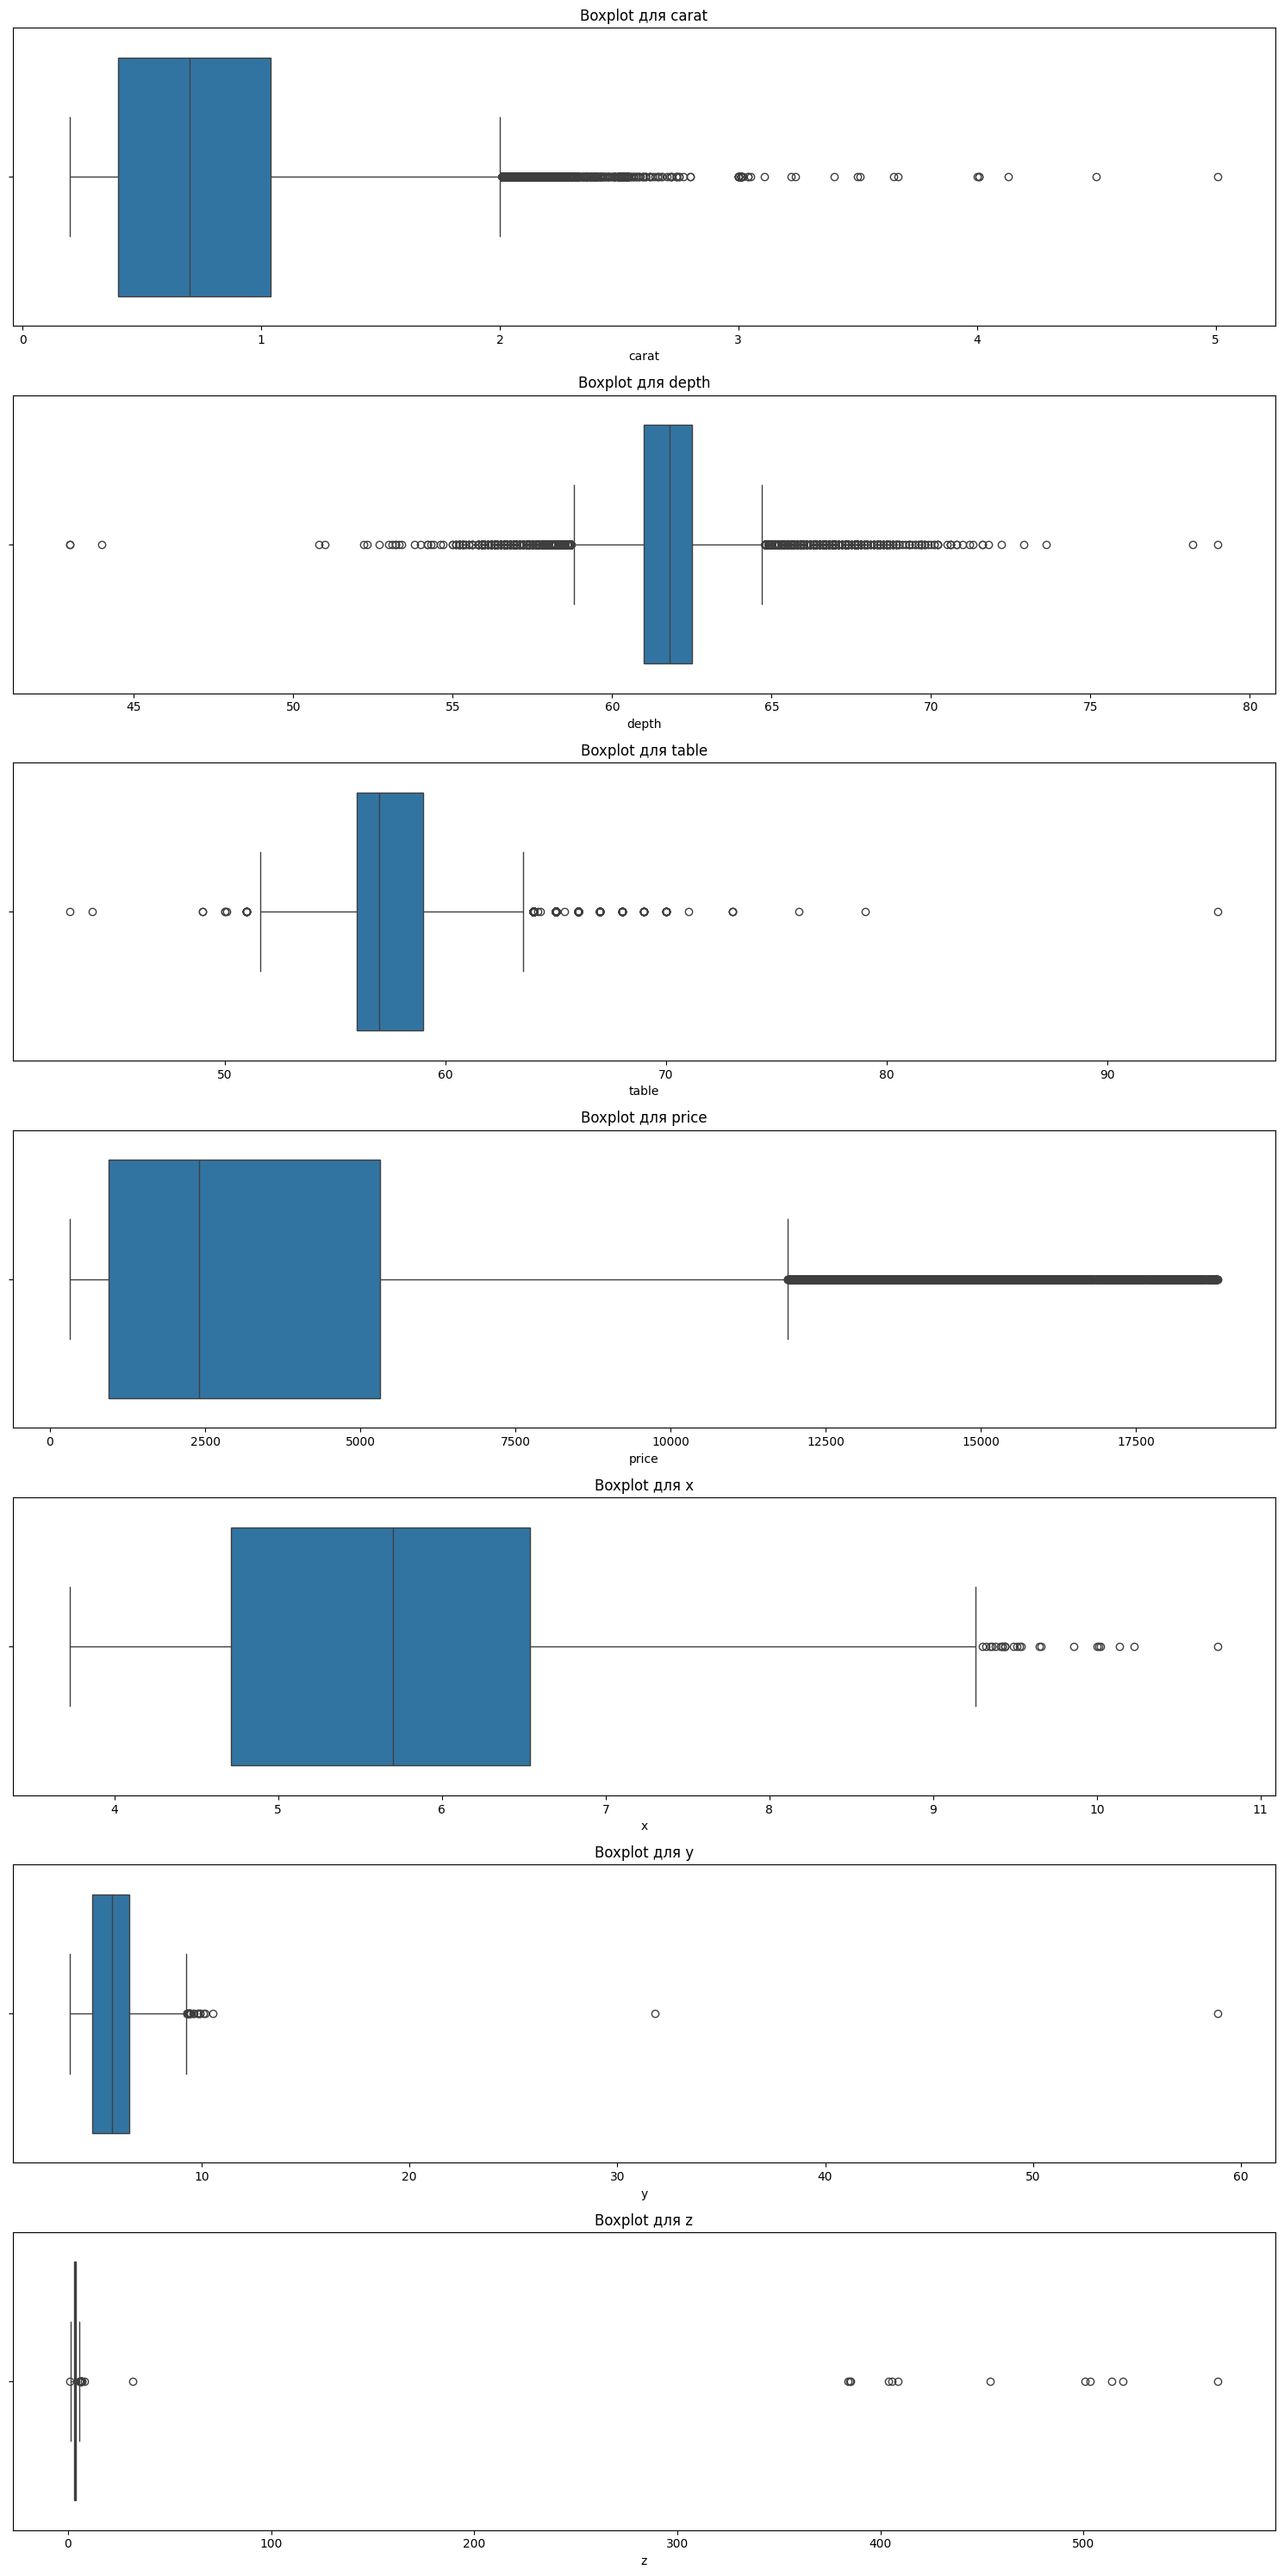

In [ ]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(nums_columns, 1):
    plt.subplot(7, 1, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot для {column}')
plt.tight_layout()
plt.show()

1. **Вес ( carat )**  
   - Большая часть значений находится в диапазоне 0–2 карата.  
   - Имеется значительное количество выбросов в области 2+ карата, что говорит о наличии редких, крупных бриллиантов.  

2. **Глубина ( depth )**  
   - Большинство значений лежит в диапазоне 58–63%.  
   - За его пределами присутствует множество выбросов, особенно ниже 55% и выше 65%.  
   - Аномальные значения ниже 45% и выше 75% могут указывать на ошибки или необычные формы огранки.  

3. **Ширина ( table )**  
   - Основная масса значений находится в диапазоне 54–62%.  
   - Выбросы встречаются ниже 50% и выше 70%, особенно экстремальные значения выше 90%, что нетипично для бриллиантов.  

4. **Цена ( price )**   
   - Наблюдается длинный "хвост" выбросов в диапазоне 11 600+ , что соответствует самым дорогим бриллиантам. Это не обязательно выбросы, просто дорогие бриллианты.

5. **Длина бриллианта (x)**  
   - Большая часть значений лежит в диапазоне 4–8 мм.  
   - Выбросы начинаются после 9 мм, но не выглядят аномально высокими.  

6. **Ширина бриллианта (y)**  
   - Присутствуют экстремальные выбросы (30+ мм, 50+ мм), что, вероятно, является ошибкой ввода данных.  
   - Большая часть значений лежит в диапазоне 4–8 мм.  

7. **Высота бриллианта (z)**  
   - Есть несколько экстремальных выбросов (100+ мм, 500+ мм), что, скорее всего, ошибка.  
   - Основная часть значений находится в диапазоне до 10 мм.  


## Категориальные

In [ ]:
categorical_columns = ['cut', 'color', 'clarity']

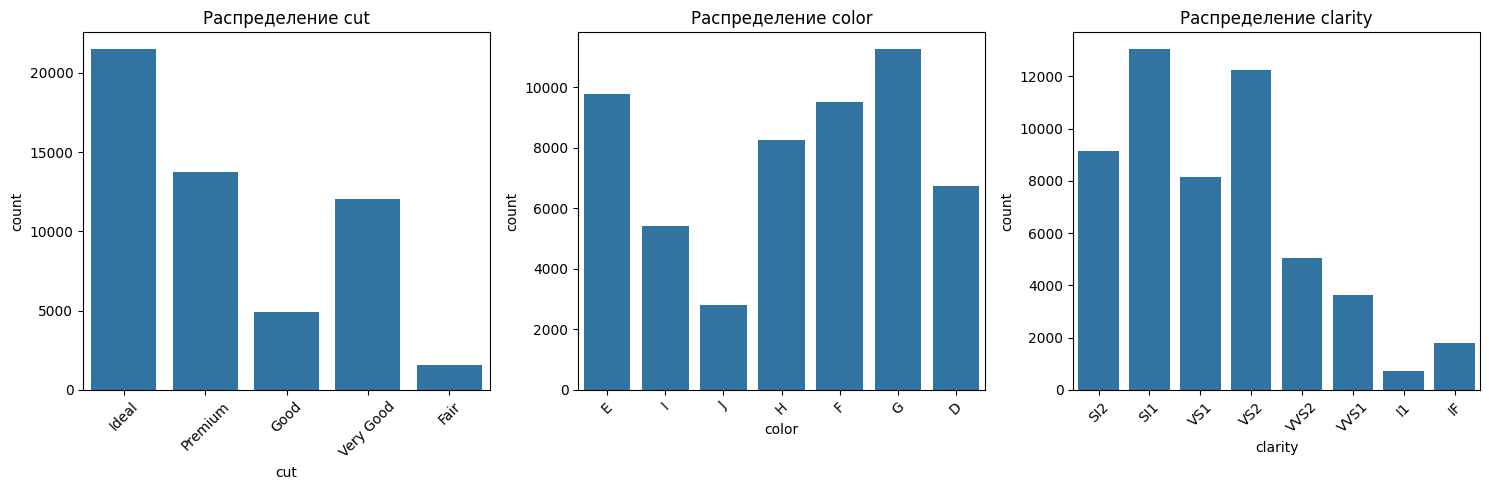

In [ ]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=data[column])
    plt.title(f'Распределение {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. **Качество огранки ( cut )**:
    - Наиболее распространённый тип огранки — Ideal (более 20 000 бриллиантов), что говорит о высоком качестве представленных камней.
    - Второй по популярности — Premium, далее следуют Very Good и Good.
Fair встречается реже всего, что может свидетельствовать о меньшей востребованности или низком качестве таких бриллиантов.

2. **Цвет ( color )**:
    - Наиболее распространённый цвет — G, за ним следуют E и F.
    - Наименее встречаемый цвет — J ( худший цвет ).
    - В целом, большее количество бриллиантов находится в диапазоне от D до G ( средние+ ), что свидетельствует о стремлении покупателей к высоким цветовым характеристикам.

3. **Прозрачность ( clarity )**:
    - Чаще всего встречаются камни с чистотой SI1 и VS2, что означает, что большинство бриллиантов имеют небольшие дефекты, но они незначительны, поэтому спрос на них высокий.
    - Редко встречаются камни с высшей степенью чистоты IF и FL, что логично, так как такие бриллианты очень дорогие.
    - Камни с чистотой I1 встречаются редко, что может говорить о низком спросе на бриллианты с заметными дефекты.

# Проверьте наличие отклонений и аномалий в распределении значений признаков.  При необходимости удалите их.


Отклонения и аномалии были выявлены в визуализации.


In [ ]:
data_clear = data.copy()

In [ ]:
# Удаление выбросов по столбцу depth
data_clear = data_clear[(data_clear['depth'] > 45) & (data_clear['depth'] < 75)]

# Удаление выбросов по столбцу table
data_clear = data_clear[(data_clear['table'] > 45) & (data_clear['table'] < 80)]

# Удаление выбросов по столбцу y
data_clear = data_clear[data_clear['y'] < 30]

# Удаление выбросов по столбцу z
data_clear = data_clear[data_clear['z'] < 30]


In [ ]:
data_clear = data_clear.reset_index(drop=True)

In [ ]:
data_clear

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53759,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53760,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53761,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53762,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data_clear.describe()

,carat,depth,table,price,x,y,z
count,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000
mean,0.797495,61.748702,57.457626,3931.068615,5.731497,5.733392,3.539251
std,0.473144,1.419296,2.224720,3985.887598,1.118580,1.110492,0.691056
min,0.200000,50.800000,49.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


# Визуализируйте зависимости в признаках.

Text(0.5, 1.02, 'Матрица диаграмм рассеяния (Pairplot)')

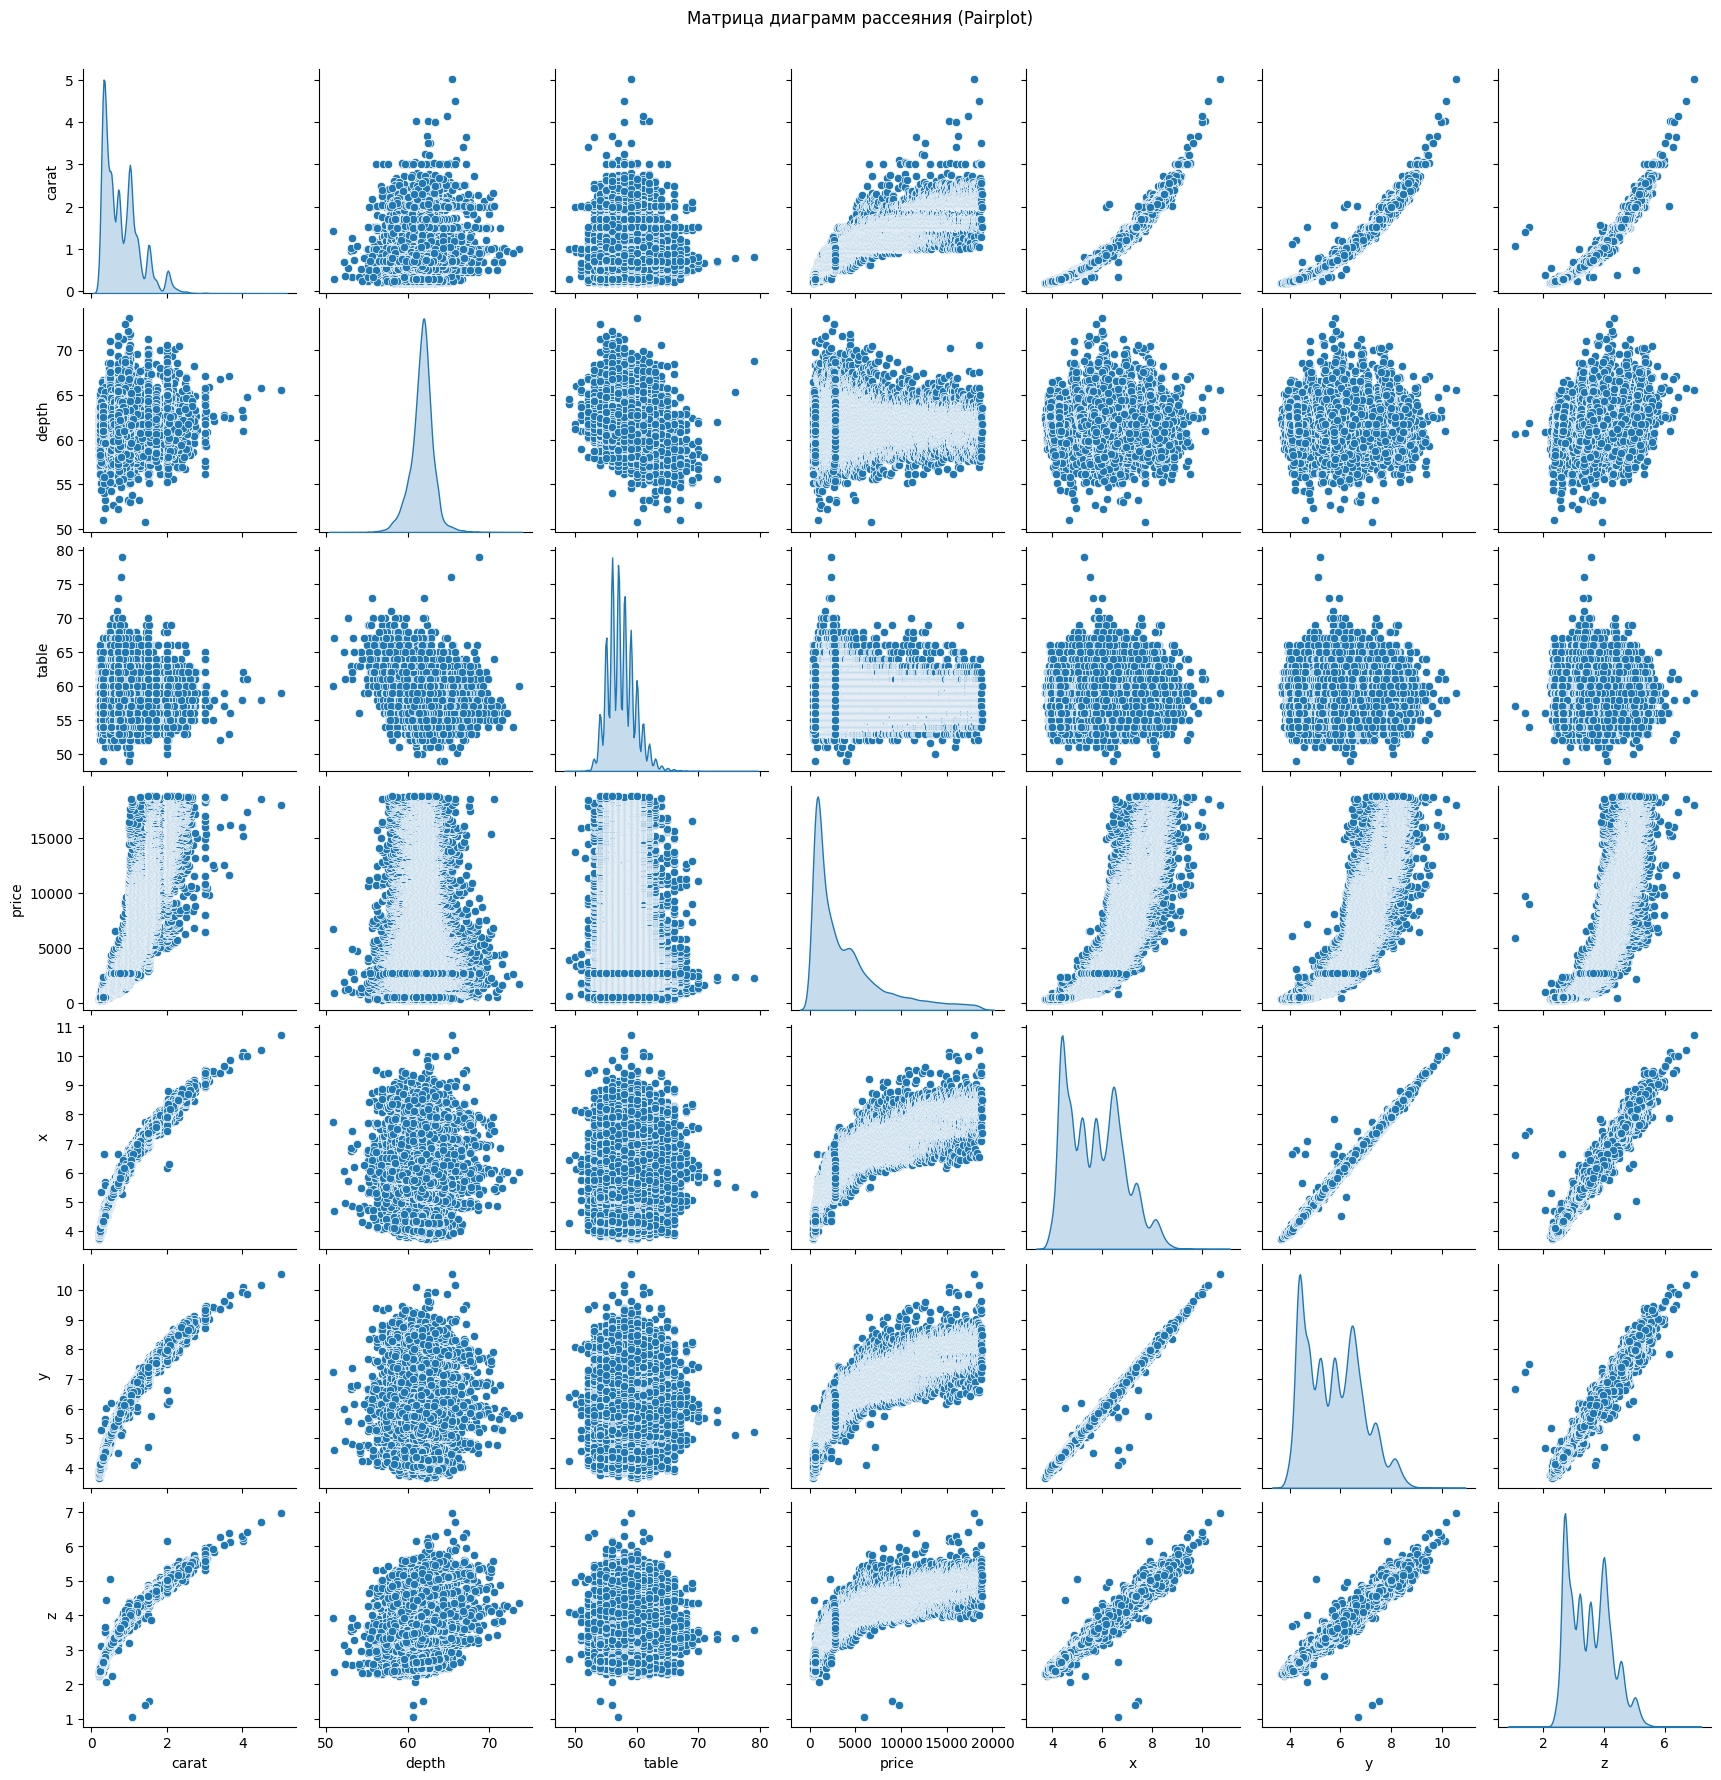

In [ ]:
sns.pairplot(data_clear, diag_kind='kde').fig.suptitle(
    'Матрица диаграмм рассеяния (Pairplot)', y=1.02
)

1. **Связь между переменными**  
   - Наблюдается сильная положительная корреляция между переменными `carat` и `price`. Это логично, так как больший вес бриллианта обычно означает более высокую стоимость.  
   - Переменные `x`, `y`, `z` (размеры бриллианта) также коррелируют между собой и с `carat`, что ожидаемо, так как большие бриллианты имеют более крупные размеры.  

2. **Распределение данных**  
   - Переменная `price` имеет асимметричное распределение с резким пиком на нижних значениях, что указывает на наличие большого количества дешёвых бриллиантов и меньшего количества дорогих.  
   - Аналогичная ситуация наблюдается для `carat`, где небольшие камни встречаются значительно чаще.  

3. **Линейные зависимости**  
   - Для пар `x - y`, `x - z`, `y - z` отчётливо видны почти линейные зависимости, что подтверждает логическую связь между размерными параметрами бриллиантов.  
   - Также видно, что `carat` и `price` имеют нелинейную зависимость, что может потребовать логарифмирования для улучшения линейных моделей.  


# Постройте "тепловую карту" зависимости признаков.

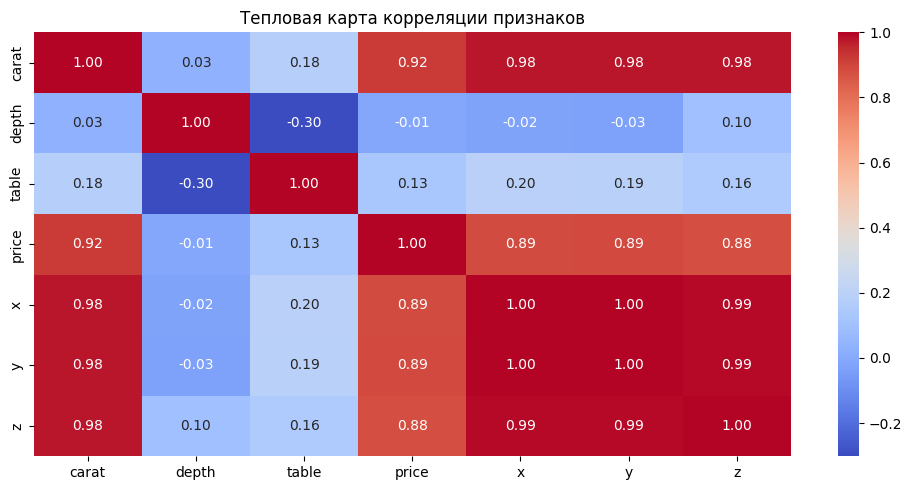

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(data_clear.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Тепловая карта корреляции признаков")
plt.tight_layout()
plt.show()

1. **Сильная корреляция (`> 0.85`):**  
   - `carat` и `price` (0.92) → Чем больше вес бриллианта, тем выше его цена. Это ожидаемая закономерность.  
   - `x`, `y`, `z` между собой (≈1.00) → Логично, так как размеры бриллианта взаимосвязаны.  
   - `carat` и `x, y, z` (≈0.98) → Вес бриллианта напрямую зависит от его физических размеров.  

2. **Слабая или отсутствующая корреляция:**  
   - `depth` практически не влияет на цену (`-0.01`) и слабо коррелирует с `carat`, `x`, `y`, `z`. Это означает, что глубина бриллианта не является ключевым фактором в его стоимости.  
   - `table` имеет слабую связь с `price` (0.13), что говорит о небольшом влиянии параметра таблицы на цену.  

3. **Обратная корреляция:**  
   - `depth` и `table` (-0.30) → Чем больше глубина, тем меньше таблица бриллианта. Это ожидаемо, так как эти параметры описывают геометрию камня.  

# Рассмотрите категориальные признаки, выберите наиболее подходящий способ кодирования для каждого.

cut, color и clarity - категориальные признаки с естественными порядковыми связями. Поэтому лучшим вариантом кодирования будет Ordinal encoder

# Отделите целевой признак — цену. Разбейте набор данных на тренировочную и тестовую выборки.

Кодирование категориальных признаков и разбитие набора данных на тренировочную и тестовую выборки

In [ ]:
def encoding_data(data, encoder):
    data = data
    # Кодирование
    if encoder == 'drop':
        data = data.drop(['cut', 'color', 'clarity'], axis=1)

    elif encoder == 'ordinal':
        encoder_ord = OrdinalEncoder(categories=[
            ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
            ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
            ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
        ])

        data[['cut', 'color', 'clarity']] = encoder_ord.fit_transform(data[['cut', 'color', 'clarity']])

    elif encoder == 'onehot':
        encoder = OneHotEncoder(sparse_output=False)
        encoded_data = encoder.fit_transform(data[['cut', 'color', 'clarity']])
        encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['cut', 'color', 'clarity']))
        data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1)
        data = data.drop(['cut', 'color', 'clarity'], axis=1)

    # Разбиение данных на тренировочную и тестовые выборки
    data_price = data.price
    data = data.drop('price', axis=1).reset_index(drop=True)

    X_train, X_test, y_train, y_test = train_test_split(data, data_price, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Проведите нормализацию признаков.

In [ ]:
standart_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Постройте линейную регрессию для предсказания цен. Оцените результат с помощью метрик r2 и MSE.

Функция линейной регрессии:

In [ ]:
def model_line(X_train, X_test, y_train, y_test):
    line_model = LinearRegression()
    line_model.fit(X_train, y_train)

    y_pred = line_model.predict(X_test)

    print(f"        R²: {r2_score(y_test, y_pred)}")
    print(f"        MSE: {mean_squared_error(y_test, y_pred)}")

Функция нормализации:

In [ ]:
def model_scaled(X_train, X_test, scaler):
    if scaler is None:
        X_train_scaled = X_train
        X_test_scaled = X_test
    else:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

Сравнение результатов различных кодирований и нормализаций

In [ ]:
for enc in ['ordinal', 'onehot', 'drop']:
    data_clear_enc = data_clear.copy()
    print(f"Encoder: {enc}")
    X_train, X_test, y_train, y_test = encoding_data(data_clear_enc, enc)
    for scaler in [None, standart_scaler, minmax_scaler]:
        X_train_scaled, X_test_scaled = model_scaled(X_train, X_test, scaler)
        print(f"    Scaler: {scaler}")

        model_line(X_train_scaled, X_test_scaled, y_train, y_test)
    print("")

Encoder: ordinal
    Scaler: None
        R²: 0.9070263389786963
        MSE: 1481203.454128013
    Scaler: StandardScaler()
        R²: 0.9070263389786963
        MSE: 1481203.4541280128
    Scaler: MinMaxScaler()
        R²: 0.9070263389786963
        MSE: 1481203.4541280132

Encoder: onehot
    Scaler: None
        R²: 0.9176982613371102
        MSE: 1311184.4607289408
    Scaler: StandardScaler()
        R²: 0.9176982613371099
        MSE: 1311184.4607289461
    Scaler: MinMaxScaler()
        R²: 0.9176982613371101
        MSE: 1311184.4607289415

Encoder: drop
    Scaler: None
        R²: 0.8585175197659072
        MSE: 2254018.3544382276
    Scaler: StandardScaler()
        R²: 0.8585175197659072
        MSE: 2254018.354438227
    Scaler: MinMaxScaler()
        R²: 0.8585175197659072
        MSE: 2254018.3544382267



1. **Влияние типа кодирования категориальных признаков:**  
   - **OneHot Encoding** даёт наилучший результат:  
     - R² = **0.9177** ( выше, чем у других методов )  
     - MSE = **1,311,184** ( наименьшая ошибка, значит модель точнее )  
   - **Ordinal Encoding** немного хуже:  
     - R² = **0.9070** ( чуть ниже, чем у OneHot )  
     - MSE = **1,481,203** ( более высокая ошибка )  
   - **Drop Encoding ( удаление категориальных признаков )** значительно ухудшает модель:  
     - R² = **0.8585** ( заметно ниже )  
     - MSE = **2,254,018** ( самая большая ошибка )  
   - **Вывод:** Категориальные признаки важны для предсказания, и OneHot Encoding работает лучше всего.  

2. **Влияние масштабирования ( Scaler ):**  
   - Вне зависимости от выбора масштабирования ( StandardScaler, MinMaxScaler или отсутствие скейлера ), значения R² и MSE не меняются.  
   - Это говорит о том, что линейная регрессия не чувствительна к скейлингу в данной задаче, вероятно, потому что признаки уже находятся в сопоставимых диапазонах.  
   - **Вывод:** Масштабирование не оказывает влияния, но OneHot Encoding даёт лучшие результаты.  

# Постройте полиномиальную регрессию. Сравните результаты с предыдущими.

Так как нормализация никак не влияет на результаты регрессии, но полиномиальной регрессии не будем ее смотреть.

In [ ]:
for enc in ['ordinal', 'onehot', 'drop']:
    data_clear_enc = data_clear.copy()

    print(f"Encoder: {enc}")
    X_train, X_test, y_train, y_test = encoding_data(data_clear_enc, enc)

    for i in range(2, 4):
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, y_train)

        y_pred_poly = poly_model.predict(X_test_poly)

        print(f"\n    R² для степени {i}: {r2_score(y_test, y_pred_poly)}")
        print(f"    MSE для степени {i}: {mean_squared_error(y_test, y_pred_poly)}")
    print()

Encoder: ordinal

    R² для степени 2: 0.9631354514452659
    MSE для степени 2: 587305.007185102

    R² для степени 3: 0.9743406370903578
    MSE для степени 3: 408790.36659401417

Encoder: onehot

    R² для степени 2: 0.9705189309277449
    MSE для степени 2: 469675.61416350916

    R² для степени 3: 0.9286658840618517
    MSE для степени 3: 1136454.537382826

Encoder: drop

    R² для степени 2: 0.8743746341248504
    MSE для степени 2: 2001391.8330884043

    R² для степени 3: 0.8773286825537122
    MSE для степени 3: 1954329.6147307882



1. **Влияние степени полиномиальных признаков:**  
   - При увеличении степени с **2 до 3** R² растёт, а MSE уменьшается в случае **Ordinal Encoding** и **Drop Encoding**, что указывает на улучшение модели.  
   - Однако для **OneHot Encoding** R² **снижается** при переходе со **2-й на 3-ю степень**, а MSE сильно возрастает (**469,675 → 1,136,454**), что указывает на **переобучение**.  

2. **Влияние метода кодирования категориальных переменных:**  
   - **Лучший результат показал Ordinal Encoding с полиномом 3-й степени**:  
     - **R² = 0.9743 (максимальный среди всех вариантов)**  
     - **MSE = 408,790 (наименьшая ошибка)**  
     - Полиномиальные признаки хорошо работают с порядковыми категориями.  
   - **OneHot Encoding работает лучше на 2-й степени, но хуже на 3-й**:  
     - **2-я степень:** R² = **0.9705**, MSE = **469,675**  
     - **3-я степень:** R² **падает до 0.9286**, а MSE увеличивается более чем в 2 раза, что подтверждает **переобучение**.  
   - **Drop Encoding даёт худшие результаты**, так как удаление категориальных признаков снижает качество модели.  

3. **Выбор оптимального метода:**  
   - **Для 2-й степени:** OneHot Encoding работает лучше (R² = 0.9705, MSE = 469,675).  
   - **Для 3-й степени:** **Ordinal Encoding даёт лучший результат** (R² = 0.9743, MSE = 408,790).  
   - OneHot Encoding **не подходит для 3-й степени**, так как модель переобучается.  


# Используйте другой тип регрессии ( на ваш выбор ) и сравните результаты.

In [ ]:
elastic_net_model = ElasticNet(alpha=0.005, max_iter=1000)

In [ ]:
for enc in ['ordinal', 'onehot', 'drop']:
    data_clear_enc = data_clear.copy()
    print(f"Encoder: {enc}")
    X_train, X_test, y_train, y_test = encoding_data(data_clear_enc, enc)
    for scaler in [None, standart_scaler, minmax_scaler]:
        X_train_scaled, X_test_scaled = model_scaled(X_train, X_test, scaler)
        print(f"    Scaler: {scaler}")

        elastic_net_model.fit(X_train_scaled, y_train)
        y_pred = elastic_net_model.predict(X_test_scaled)

        print(f"        R²: {r2_score(y_test, y_pred)}")
        print(f"        MSE: {mean_squared_error(y_test, y_pred)}")
    print()

Encoder: ordinal
    Scaler: None


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.381e+09, tolerance: 6.828e+07
  model = cd_fast.enet_coordinate_descent(


        R²: 0.9041888776155881
        MSE: 1526408.27370619
    Scaler: StandardScaler()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.764e+10, tolerance: 6.828e+07
  model = cd_fast.enet_coordinate_descent(


        R²: 0.9063712642222892
        MSE: 1491639.7323302869
    Scaler: MinMaxScaler()
        R²: 0.8678789737905233
        MSE: 2104876.996718168

Encoder: onehot
    Scaler: None


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.717e+09, tolerance: 6.828e+07
  model = cd_fast.enet_coordinate_descent(


        R²: 0.9148627155519388
        MSE: 1356358.7624096253
    Scaler: StandardScaler()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.839e+10, tolerance: 6.828e+07
  model = cd_fast.enet_coordinate_descent(


        R²: 0.9173968355045432
        MSE: 1315986.605545624
    Scaler: MinMaxScaler()
        R²: 0.8755038377675195
        MSE: 1983402.003306913

Encoder: drop
    Scaler: None


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.863e+09, tolerance: 6.828e+07
  model = cd_fast.enet_coordinate_descent(


        R²: 0.8550195918331591
        MSE: 2309745.3515185094
    Scaler: StandardScaler()
        R²: 0.8572040053354892
        MSE: 2274944.5187949934
    Scaler: MinMaxScaler()
        R²: 0.8168527993229844
        MSE: 2917796.9682673025



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.645e+10, tolerance: 6.828e+07
  model = cd_fast.enet_coordinate_descent(


1. **Влияние кодирования категориальных признаков:**  
   - **Лучший результат показал OneHot Encoding + StandardScaler** (**R² = 0.9174, MSE = 1,315,986**)  
   - **Ordinal Encoding + StandardScaler тоже показал хороший результат** (**R² = 0.9064, MSE = 1,491,639**)  
   - **Drop Encoding даёт худшие результаты**, так как удаление категориальных признаков снижает точность модели (**R² = 0.8572, MSE = 2,274,944**)  

2. **Влияние масштабирования:**  
   - **Стандартное масштабирование (StandardScaler) даёт наилучшие результаты** практически во всех случаях.  
   - **MinMaxScaler ухудшает качество модели**, особенно для Drop Encoding (**R² = 0.8168, MSE = 2,917,796**).   

3. **Оптимальный вариант:**  
   - **Лучший вариант:** **OneHot Encoding + StandardScaler** (R² = **0.9174**, MSE = **1,315,986**)  
   - **Альтернативный вариант:** **Ordinal Encoding + StandardScaler** (R² = **0.9064**, MSE = **1,491,639**)  
   - **Худший вариант:** **Drop Encoding (особенно с MinMaxScaler)**  

# Вывод


Наилучшие результаты среди всех моделей показала полиномиальная регрессия третьей степени с OrdinalEncoder